In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv('/content/IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
sepal=data.drop(['petal_length','petal_width','species'],1)
sepal.head()

<ipython-input-4-f51f350d9038>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  sepal=data.drop(['petal_length','petal_width','species'],1)


,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


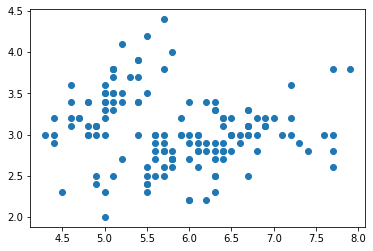

In [5]:
plt.scatter(sepal['sepal_length'],sepal['sepal_width'])

In [6]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_pred=km.fit_predict(sepal)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [8]:
sepal['cluster']=y_pred
sepal

,sepal_length,sepal_width,cluster
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,2
147,6.5,3.0,0
148,6.2,3.4,0


Text(0, 0.5, 'sepal_width')

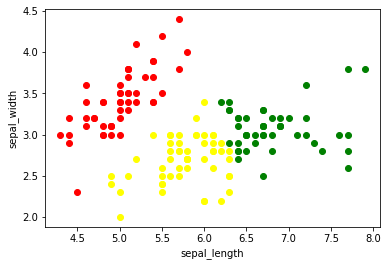

In [10]:
sep1=sepal[sepal.cluster==0]
sep2=sepal[sepal.cluster==1]
sep3=sepal[sepal.cluster==2]

plt.scatter(sep1['sepal_length'],sep1['sepal_width'],color='green')
plt.scatter(sep2['sepal_length'],sep2['sepal_width'],color='red')
plt.scatter(sep3['sepal_length'],sep3['sepal_width'],color='yellow')

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

In [11]:
centroid=km.cluster_centers_
centroid

array([[6.81276596, 3.07446809],
       [5.006     , 3.418     ],
       [5.77358491, 2.69245283]])

Text(0, 0.5, 'sepal_width')

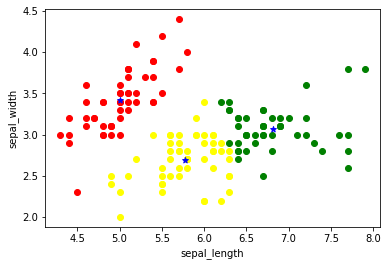

In [12]:
plt.scatter(sep1['sepal_length'],sep1['sepal_width'],color='green')
plt.scatter(sep2['sepal_length'],sep2['sepal_width'],color='red')
plt.scatter(sep3['sepal_length'],sep3['sepal_width'],color='yellow')
plt.scatter(centroid[:,0],centroid[:,1],color='blue',marker='*')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

In [13]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(sepal)
    sse.append(km.inertia_)
    
sse

[229.94093333333325,
 91.55432348688292,
 37.12370212765957,
 29.68336879432624,
 22.63752424567003,
 17.514521013607972,
 15.556886137325808,
 13.694740376582486,
 12.22262430869784]

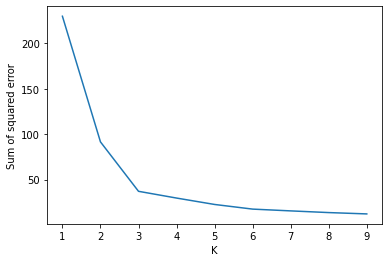

In [14]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [15]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [16]:
new_data=data.drop('species',1)
new_data.head()

<ipython-input-16-5c110ceab980>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_data=data.drop('species',1)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(new_data)
    sse.append(km.inertia_)
    
sse

[680.8244000000001,
 152.36870647733906,
 78.940841426146,
 57.317873214285704,
 46.53558205128205,
 38.930963049671746,
 34.2045677933178,
 29.91463344988346,
 27.961553258145365]

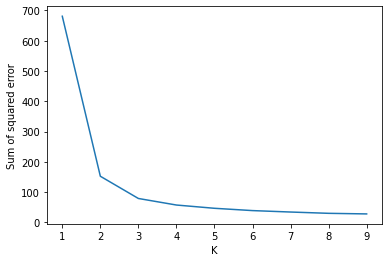

In [18]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [19]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [20]:
prediction=km.fit_predict(new_data)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [21]:
data['predicted']=prediction
data

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [22]:
centroids=km.cluster_centers_
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [23]:
data1=data.copy()
data1["species"]=data1["species"].map({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2}).astype(int)
data1['predicted']=prediction
data1

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data1['species'],prediction)

array([[48,  0,  2],
       [ 0, 50,  0],
       [14,  0, 36]])

In [25]:
data['predicted']=prediction
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [26]:

data["predicted"]=data["predicted"].map({0:'Iris-versicolor',1:'Iris-setosa',2:'Iris-virginica'})
data

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-versicolor
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica
